### Imports

In [1]:
import json
import numpy as np
from scipy.spatial import distance

In [9]:
data_path = 'Data_JSON/'
filename = 'AA0001'
filename_json = data_path + filename + '.json'

In [28]:
# Load the JSON file
with open(filename_json) as f:
    data = json.load(f)

# Extract the data
samples = data['neuron']['axon']

# Convert nodes to SWC format
swc_axons_samples = []
for sample in samples:
    swc_axons_sample = [sample['structureIdentifier'], sample['x'], sample['y'], sample['z'], sample['radius'], sample['parentNumber'], sample['allenId']]
    swc_axons_samples.append(swc_axons_sample)

# Write the SWC file
output_filename = filename + '.swc'
with open(output_filename, 'w') as f:
    for swc_axons_sample in swc_axons_samples:
        f.write('{} {} {} {} {} {} {}\n'.format(*swc_axons_sample))

In [32]:
import json
import numpy as np
from scipy.spatial import distance

def convert_json_to_swc(input_file, output_file):
    with open(input_file) as f:
        data = json.load(f)

    neuron = data['neuron']
    nodes = []
    edges = []

    # Parse soma, axon, and dendrite data
    for section_type in ['soma', 'axon', 'dendrite']:
        section_data = neuron[section_type]
        parent_node_id = section_data['parent'] if 'parent' in section_data else None
        for node_data in section_data:
            node_id = node_data['id']
            node_x = node_data['location']['x']
            node_y = node_data['location']['y']
            node_z = node_data['location']['z']
            node_radius = node_data['radius']
            node_type = section_type.upper()
            nodes.append((node_id, node_type, node_x, node_y, node_z, node_radius, parent_node_id))
            if parent_node_id is not None:
                edges.append((parent_node_id, node_id, 2, distance.euclidean(
                    np.array([node_x, node_y, node_z]),
                    np.array([nodes[parent_node_id-1][2], nodes[parent_node_id-1][3], nodes[parent_node_id-1][4]])
                )))
            parent_node_id = node_id

    # Write SWC data to output file
    with open(output_file, 'w') as f:
        for node in nodes:
            f.write('{} {} {} {} {} {} {}\n'.format(*node))
        for edge in edges:
            f.write('{} {} {} {}\n'.format(*edge))


In [33]:
convert_json_to_swc(filename_json, filename + '.swc')

TypeError: string indices must be integers

In [21]:
data['neuron'].keys()

dict_keys(['idString', 'DOI', 'sample', 'label', 'annotationSpace', 'soma', 'axon', 'dendrite', 'allenInformation'])

In [35]:
data['neuron']['axon'][0]

{'sampleNumber': 1,
 'structureIdentifier': 1,
 'x': 4625.3821881875,
 'y': 2534.79472175,
 'z': 2977.33168800001,
 'radius': 1,
 'parentNumber': -1,
 'allenId': 974}

In [39]:
from vedo import Plotter
from morphapi.api.mouselight import MouseLightAPI

# ---------------------------- Downloading neurons --------------------------- #
mlapi = MouseLightAPI()

# Fetch metadata for neurons with soma in the secondary motor cortex
neurons_metadata = mlapi.fetch_neurons_metadata()

In [44]:
neurons = mlapi.download_neurons(neurons_metadata[1000])

/Users/leonardopollina/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'neuromorpho.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/leonardopollina/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'neuromorpho.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/leonardopollina/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'neuromorpho.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.w

creating meshes
visualizing


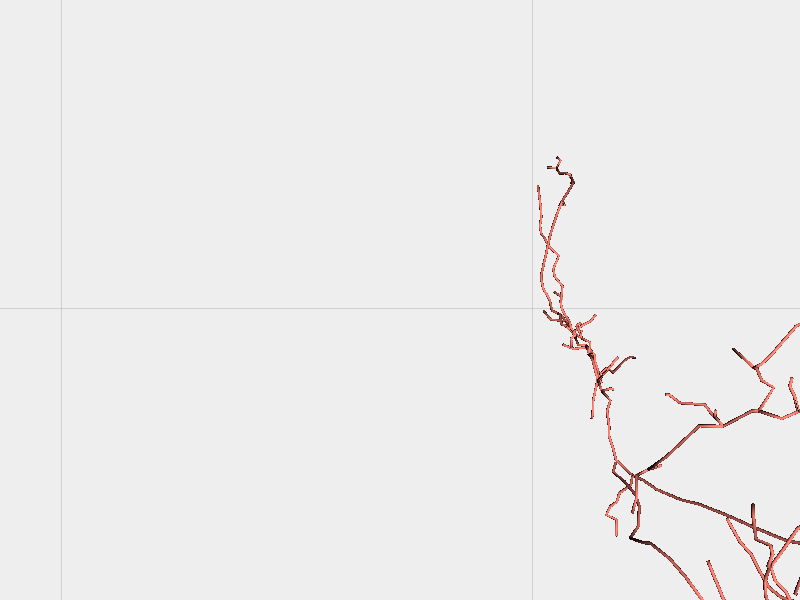

In [46]:
print("creating meshes")
neurons = [neuron.create_mesh()[1] for neuron in neurons]

print("visualizing")
vp = Plotter(shape=(1, len(neurons)), axes=1)

vp.show(neurons)

In [41]:
neurons_metadata[0]

{'brainArea_acronym': 'CA3sp',
 'brainArea_id': '871b7b56-9529-4ab3-b584-6cc48d78f8ee',
 'brainArea_name': 'Field CA3 pyramidal layer',
 'brainArea_safename': 'Field CA3 pyramidal layer',
 'brainArea_atlasId': 61,
 'brainArea_structureIdPath': '/997/8/567/688/695/1089/1080/375/463/495/',
 'id': 'ac152234-d5fe-490b-ab76-fb5f748d3381',
 'idNumber': None,
 'idString': 'AA1548',
 'tag': 'G-001',
 'soma': node(x=2828.22641849999, y=2338.7607886875, z=7397.326022625, r=1, area_acronym='Field CA3 pyramidal layer', sample_n=1, parent_n=-1),
 'axon': tracing_structure(id='581ede1d-cba1-45a2-9a67-674e5254cfe0', name='dendrite', value=2, named_id='aef2ba31-8f9b-4a47-9de0-58dab1cc06a8'),
 'dendrite': tracing_structure(id='b3bd5a75-867b-4e1f-91f3-84a88654f503', name='axon', value=1, named_id='68e76074-1777-42b6-bbf9-93a6a5f02fa4')}